In [162]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data = pd.read_csv("data_week2.csv", encoding='cp949')
data.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [164]:
cols = ['num', 'date_time', 'power', 'temp', 'wind','hum' ,'rain', 'sun', 'cooler', 'solar']
data.columns = cols

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   num        122400 non-null  int64  
 1   date_time  122400 non-null  object 
 2   power      122400 non-null  float64
 3   temp       122400 non-null  float64
 4   wind       122400 non-null  float64
 5   hum        122400 non-null  float64
 6   rain       122400 non-null  float64
 7   sun        122400 non-null  float64
 8   cooler     122400 non-null  float64
 9   solar      122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


# 시간 관련 변수들 생성
date = pd.to_datetime(data.date_time)
data['hour'] = date.dt.hour
data['day'] = date.dt.weekday
data['month'] = date.dt.month
data['week'] = date.dt.isocalendar().week

In [166]:
print(data.columns)
print(data.shape)

Index(['num', 'date_time', 'power', 'temp', 'wind', 'hum', 'rain', 'sun',
       'cooler', 'solar'],
      dtype='object')
(122400, 10)


In [167]:
print(data.describe())
print(data[['power', 'temp', 'hum', 'rain', 'sun', 'cooler']].isnull().sum().max())

                 num          power           temp           wind  \
count  122400.000000  122400.000000  122400.000000  122400.000000   
mean       30.500000    2324.830866      24.251713       2.151641   
std        17.318173    2058.999326       3.407902       1.514475   
min         1.000000       0.000000      11.100000       0.000000   
25%        15.750000    1055.268000      21.800000       1.100000   
50%        30.500000    1700.352000      24.200000       1.900000   
75%        45.250000    2780.487000      26.500000       2.900000   
max        60.000000   17739.225000      36.300000      20.100000   

                 hum           rain            sun         cooler  \
count  122400.000000  122400.000000  122400.000000  122400.000000   
mean       80.169848       0.514989       0.213533       0.683333   
std        15.525862       2.624505       0.370517       0.465178   
min        19.000000       0.000000       0.000000       0.000000   
25%        70.000000       0.0000

In [168]:
# 년도, 월, 일 
# data['year'] = data.dt.year
date = pd.to_datetime(data.date_time)
data['month'] = date.dt.month
data['day'] = date.dt.day
data['hour'] = date.dt.hour
data['week'] = date.dt.weekday

def is_holiday(row):
    if row['week'] in [5, 6]:
        return 1
    elif (row['month'] == 6 and row['day'] == 6) or \
         (row['month'] == 8 and row['day'] in [15, 17]):
        return 1
    else:
        return 0
data['holiday'] = data.apply(is_holiday, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   num        122400 non-null  int64  
 1   date_time  122400 non-null  object 
 2   power      122400 non-null  float64
 3   temp       122400 non-null  float64
 4   wind       122400 non-null  float64
 5   hum        122400 non-null  float64
 6   rain       122400 non-null  float64
 7   sun        122400 non-null  float64
 8   cooler     122400 non-null  float64
 9   solar      122400 non-null  float64
 10  month      122400 non-null  int32  
 11  day        122400 non-null  int32  
 12  hour       122400 non-null  int32  
 13  week       122400 non-null  int32  
 14  holiday    122400 non-null  int64  
dtypes: float64(8), int32(4), int64(2), object(1)
memory usage: 12.1+ MB


<Axes: xlabel='date_time', ylabel='power'>

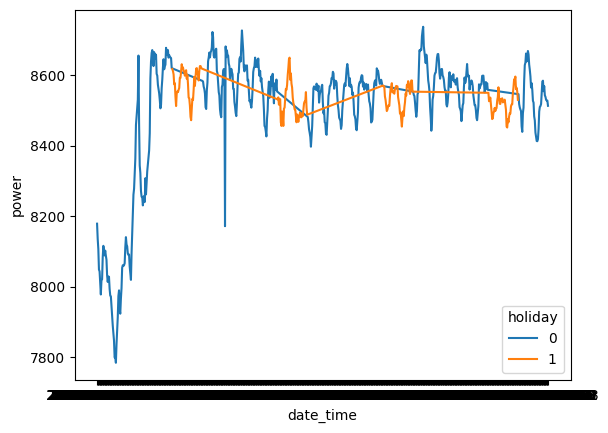

In [24]:
# 건물 1
b1 = data[data['num']==1]
b1_june = b1[b1['month']==6]

sns.lineplot(x = b1_june['date_time'], y = b1_june['power'], hue = b1_june['holiday'], estimator = None)

c:\Users\USER\DS\Miniconda\envs\ls_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\DS\Miniconda\envs\ls_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\DS\Miniconda\envs\ls_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\DS\Miniconda\envs\ls_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

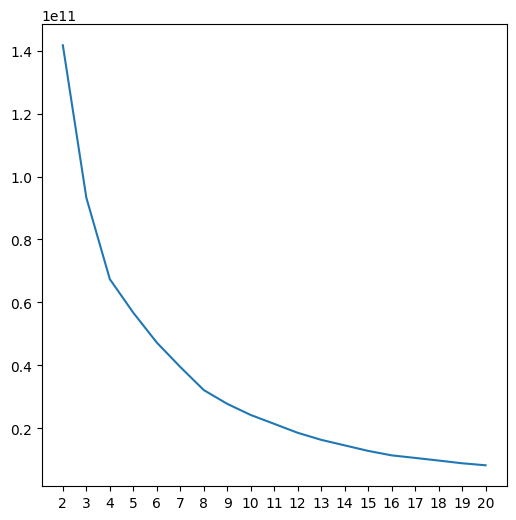

In [169]:
cluster_df = pd.DataFrame()
from sklearn.cluster import KMeans
for bn in range(1,61): 
    cluster_df[bn] = data.loc[data.num == bn, 'power'].values
    
cluster_df = cluster_df.T # 전치    

krange = range(2, 21)
inertias = []
label_list = []
for K in krange:
    km = KMeans(n_clusters=K, n_init=30, random_state=42)
    labels = km.fit_predict(cluster_df) # 100 x 2040
    inertia = km.inertia_

    inertias.append(inertia)
    label_list.append(labels)

plt.figure(figsize=(6, 6))
plt.plot(krange, inertias)
plt.xticks(krange)
plt.show()

In [195]:
optimal_k = 4 
cluster_list = label_list[optimal_k-2] # 시작이 k가 2니깐 인덱스로는 -2 빼줘야지요

cluster_list

cluster_df = pd.DataFrame({'num':np.arange(1,61),
                          'cluster':cluster_list})
df_clust = data.copy()
df_clust= pd.merge(df_clust, cluster_df, on='num', how = 'left')
df_clust.cluster.value_counts()

cluster
2    75480
0    34680
1     8160
3     4080
Name: count, dtype: int64

In [191]:
cluster0 = df_clust[df_clust.cluster == 0]
cluster1 = df_clust[df_clust.cluster == 1]
cluster2 = df_clust[df_clust.cluster == 2]
cluster3 = df_clust[df_clust.cluster == 3]


array([ 3,  5, 11, 15, 24, 26, 28, 32, 33, 40, 42, 44, 47, 52, 55, 57, 60],
      dtype=int64)

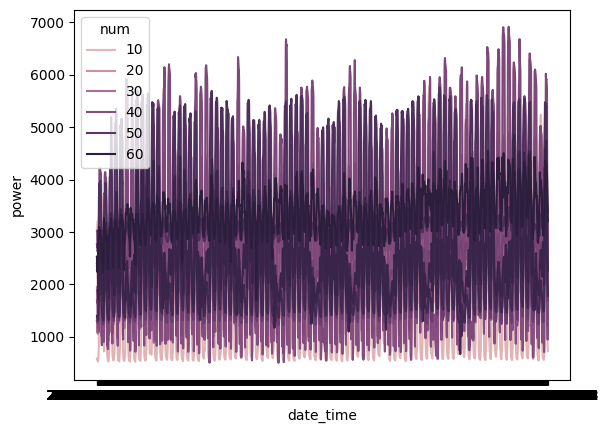

In [207]:

sns.lineplot(data = cluster0, x = 'date_time', y = 'power', hue = "num")
cluster0['num'].unique()

<Axes: xlabel='date_time', ylabel='power'>

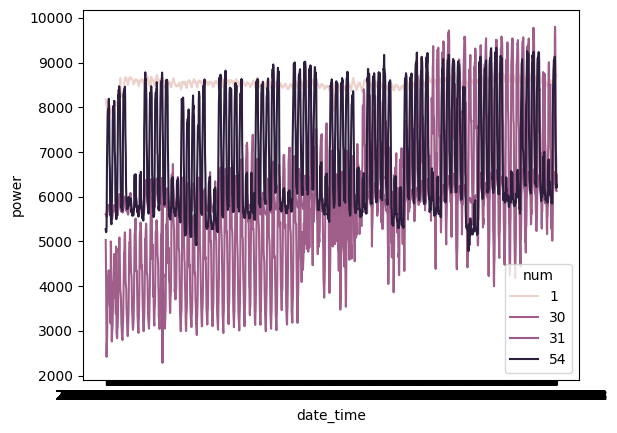

In [208]:
sns.lineplot(data = cluster1, x = 'date_time', y = 'power', hue = "num")
sns.lineplot(data = cluster1, x = 'date_time', y = 'power', hue = "num")
sns.lineplot(data = cluster1, x = 'date_time', y = 'power', hue = "num")